In [9]:
import torch
import math
from IPython.display import Image

In [10]:
#Random initialization

T, d_k,d_v = 4,8,8  #T = Length of the sequence(num_words in a squence)
q = torch.randn(T,d_k)
k = torch.randn(T,d_k)
v = torch.randn(T,d_v)

print("What am i Looking for: Q\n", q)
print("What i currently have: K\n", k)
print("What i give you: V\n", v)

What am i Looking for: Q
 tensor([[ 0.8384,  2.3978,  0.7004,  1.8969, -2.3815, -0.8524, -0.0114,  2.3902],
        [ 0.2260,  1.0270, -0.3656, -0.2261, -0.7153, -0.6582, -2.2004,  1.5631],
        [ 0.1884, -0.3575, -0.7438,  0.9099,  0.4363,  0.3657, -0.6340, -0.5833],
        [ 0.0144, -0.6475, -0.1359, -2.4750,  0.2178,  1.4850, -0.3853,  0.7401]])
What i currently have: K
 tensor([[-0.4991, -1.5084,  2.9656, -1.8439,  0.3600,  0.9930,  0.7165,  1.4787],
        [-0.7883, -0.2169, -0.5710,  0.3763, -0.7289,  2.1137,  0.2990, -1.6493],
        [-2.0426,  0.0530,  0.9168,  1.8581, -1.6130, -1.0184, -0.5371, -1.0481],
        [ 0.3521, -0.9251, -0.8163,  0.4510,  0.3592, -0.1943,  0.4551, -1.0758]])
What i give you: V
 tensor([[ 2.2977, -1.9038,  0.6945,  0.7699, -0.9642,  0.5784,  0.5720, -0.0684],
        [-0.6303,  0.6413, -0.1551, -0.2875,  0.0604,  1.4471, -1.6368,  0.3278],
        [-0.8377, -0.4019, -0.6015, -1.8723,  0.0572,  0.2122, -0.3133,  0.2824],
        [-0.1765, -0.079

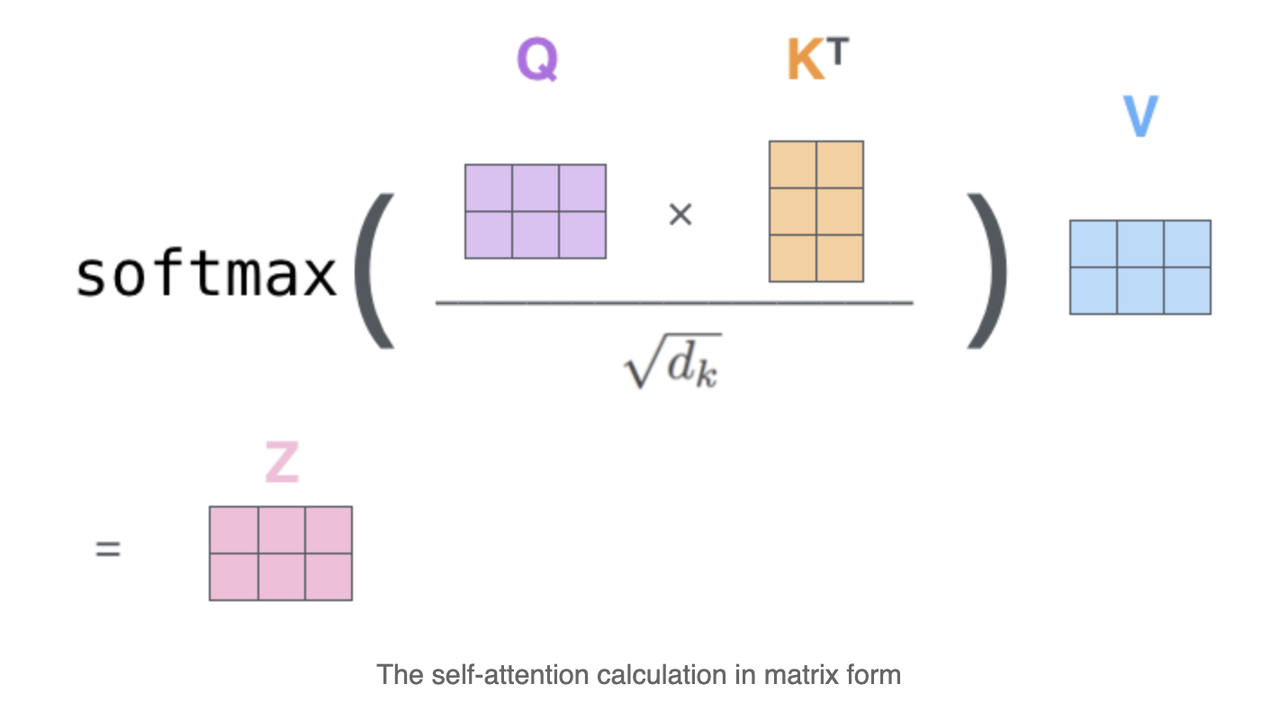

In [13]:
#Now we are going to calculate exacly how much attention we direct into each words
Image("Self_attention.png", width="500")

In [18]:
#Calculation
torch.matmul(q,k.T),torch.matmul(q,k.T).shape  #4,8 * 8,4 = 4,4

(tensor([[-3.6335, -4.8784,  4.7916, -4.9056],
         [-2.5055, -4.3832,  0.2049, -3.4862],
         [-4.2347,  1.9234,  0.4807,  1.8391],
         [ 7.5016,  0.9194, -7.2197, -1.5830]]),
 torch.Size([4, 4]))

In [21]:
#why do we need sqrt of d_k  in denominater
q.var(),k.var(),torch.matmul(q,k.T).var()

#We can observe that there is a huge imbalance with variances so make this balance we use 
#Scaled d_k

(tensor(1.4248), tensor(1.4196), tensor(15.7161))

In [42]:
#Scaled Values
scaled = torch.matmul(q,k.T) / math.sqrt(d_k)
q.var(),k.var(),scaled.var()  # yayy..... now its balanced

(tensor(1.4248), tensor(1.4196), tensor(1.9645))

### Masking
- This ensures the words don't get context from words generated in the future
- not required in the encoders, but required in the decoder

In [53]:
mask = torch.tril(torch.ones((T,T)))
mask, mask.shape

(tensor([[1., 0., 0., 0.],
         [1., 1., 0., 0.],
         [1., 1., 1., 0.],
         [1., 1., 1., 1.]]),
 torch.Size([4, 4]))

In [54]:
import numpy as np
mask[mask == 0] = -np.inf
mask[mask == 1] = 0
mask

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [55]:
scaled + mask

tensor([[-1.2846,    -inf,    -inf,    -inf],
        [-0.8858, -1.5497,    -inf,    -inf],
        [-1.4972,  0.6800,  0.1700,    -inf],
        [ 2.6522,  0.3251, -2.5526, -0.5597]])

In [59]:
#Self attention with softmax

def softmax(x):
    return (torch.exp(x).T/ torch.sum(torch.exp(x), axis = -1)).T

In [61]:
attention = softmax(scaled+mask)
attention

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.6601, 0.3399, 0.0000, 0.0000],
        [0.0661, 0.5835, 0.3504, 0.0000],
        [0.8746, 0.0853, 0.0048, 0.0352]])

In [62]:
new_v = torch.matmul(attention,v)
new_v

tensor([[ 2.2977, -1.9038,  0.6945,  0.7699, -0.9642,  0.5784,  0.5720, -0.0684],
        [ 1.3026, -1.0388,  0.4058,  0.4106, -0.6160,  0.8736, -0.1787,  0.0663],
        [-0.5093,  0.1075, -0.2553, -0.7728, -0.0085,  0.9570, -1.0270,  0.2857],
        [ 1.9456, -1.6152,  0.5912,  0.6397, -0.7987,  0.6315,  0.3549, -0.0974]])

In [63]:
v

tensor([[ 2.2977, -1.9038,  0.6945,  0.7699, -0.9642,  0.5784,  0.5720, -0.0684],
        [-0.6303,  0.6413, -0.1551, -0.2875,  0.0604,  1.4471, -1.6368,  0.3278],
        [-0.8377, -0.4019, -0.6015, -1.8723,  0.0572,  0.2122, -0.3133,  0.2824],
        [-0.1765, -0.0799, -0.0035, -0.0051,  1.1116,  0.0324, -0.1190, -1.9003]])